# China's Assistance to Zimbabwe and Equatorial Guinea 

China has substantially increased its aid to Africa over the past 20 years. China is not required to report all of its aid, but, luckily, AidData has released data that takes advantage of media reports to estimate the amount of aid China gives to Africa. This project seeks to compare China's aid to two African countries-- Zimbabwe and Equatorial Guinea. 

First, we will do a brief overview of the data for China's aid to all of Africa. Then, we will look specifically at China's aid to Equatorial Guinea, and China's aid to Zimbabwe. Finally, we will examine the disparities of AirData's data and China's officially reported aid to realize the limits of the study.

In [1]:
import os
import pandas as pd
import glob
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's read in the files. Firstly, we will look at official finance, unofficial finance, and military flows, as reported by AirData. It is important to note that the unofficial finance and military flows use media to estimate the amount China spends on Africa, meaning that these values will likely be exaggerated, and higher than the actual values.

In [2]:
l = [pd.read_csv(filename, encoding = "ISO-8859-1", low_memory = False) for filename in glob.glob("Documents/china/*.csv")]
df = pd.concat(l, axis=0)
df.head()

,project_id,donor,title,year,year_uncertain,description,crs_sector_code,crs_sector_name,sector_comment,status,...,is_ground_truthing,loan_type,interest_rate,maturity,grace_period,grant_element,updated_at,location_details,contacts,is_official_finance
0,1113,China,Free housing for the officers of the ForÃÂ§as...,2005,False,"In 2005, the Chinese worked to build houses fo...",150,Government and Civil Society,NaN,Implementation,...,False,NaN,NaN,NaN,NaN,NaN,3/26/13 15:38,Magoanine,"Tobias Dai, ; Lu Guozeng, ; Alcinda Abreu,",0
1,22580,China,$2.7 million Refurbishing of Barracks and Offi...,2005,False,"On November 18, 2005 Guinea Bissau and China h...",150,Government and Civil Society,NaN,Pipeline: Commitment,...,False,NaN,NaN,NaN,NaN,NaN,3/26/13 15:38,NaN,"Isaac Monteiro,",0
2,444,China,10 Military Vehicles,2007,False,"On November 7, 2007, the Chinese government do...",150,Government and Civil Society,NaN,Completion,...,False,NaN,NaN,NaN,NaN,NaN,3/26/13 16:42,NaN,"Wu Zexian, ; Chikez Diemu,",0
3,2227,China,25m CNY military donation,2003,False,"In November of 2003, China donated 25 million ...",150,Government and Civil Society,Equipment+Training,Implementation,...,False,NaN,NaN,NaN,NaN,NaN,3/26/13 15:38,NaN,"Sahr Johnny, ; Joe Blell, ; Alusine Deen, ; Al...",0
4,1605,China,5 million yuan worth of equipment,2006,False,"In April 2006, The Chinese Government through ...",150,Government and Civil Society,NaN,Pipeline: Commitment,...,False,NaN,NaN,NaN,NaN,NaN,3/26/13 15:38,"Defense Headquarters, Benson Street, Monrovia","Brownie J. Samukai, ; Maj. Gen. Bangdong,",0


Let's describe the data for all of Africa before we take a closer look to Zimbabwe and Equatorial Guinea. 

In [3]:
df.groupby(['year'])['usd_current'].describe().round()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2000,46.0,93600732.0,3.289917e+08,20000.0,653000.0,3011680.0,20330892.0,2.000000e+09
2001,79.0,39557801.0,2.093769e+08,20000.0,1286579.0,3624472.0,13636962.0,1.858481e+09
2002,76.0,13636704.0,4.350935e+07,10000.0,604087.0,2458173.0,5855486.0,2.977500e+08
2003,86.0,47108751.0,1.171065e+08,4461.0,516227.0,3624486.0,17975000.0,6.000000e+08
2004,100.0,91225172.0,3.497530e+08,4644.0,617525.0,3612294.0,16282500.0,2.400000e+09
2005,108.0,54057669.0,2.082270e+08,2712.0,490000.0,3630537.0,27480559.0,2.000000e+09
2006,167.0,114106524.0,4.097743e+08,399.0,1254671.0,6330000.0,30500000.0,3.116000e+09
2007,181.0,171093983.0,7.660299e+08,6260.0,1500000.0,7926355.0,60000000.0,6.000000e+09
2008,126.0,243796779.0,1.056534e+09,5000.0,1502809.0,5878255.0,40000000.0,9.000000e+09


Nearly every statistic increases dramatically and rather linearly over this period.

Let's look at the total amount of aid China gives Africa by year over this time period. 

In [4]:
df.groupby(['year'])['usd_current'].sum().round()

year
2000    4.305634e+09
2001    3.125066e+09
2002    1.036389e+09
2003    4.051353e+09
2004    9.122517e+09
2005    5.838228e+09
2006    1.905579e+10
2007    3.096801e+10
2008    3.071839e+10
2009    3.071509e+10
2010    5.332455e+10
2011    4.497291e+10
2012    5.123994e+10
Name: usd_current, dtype: float64

So, China's assistance to Africa is a bit erratic in the beginning, and decreases from 2000-2002, but increases substantially over this time period. 

## Now, let's look specifically at Equatorial Guinea and Zimbabwe. Let's start with Equatorial Guinea

In [5]:
#create a df that only looks at EG
EquatorialGuinea=df.loc[(df["recipient_oecd_name"]=="Equatorial Guinea")]

#describe this df by year
EquatorialGuinea.groupby(['year'])['usd_current'].describe().round()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2001,2.0,50190000.0,5.488563e+07,11380000.0,30785000.0,50190000.0,6.959500e+07,8.900000e+07
2002,1.0,6250000.0,NaN,6250000.0,6250000.0,6250000.0,6.250000e+06,6.250000e+06
2003,1.0,5920000.0,NaN,5920000.0,5920000.0,5920000.0,5.920000e+06,5.920000e+06
2005,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,3.0,687500000.0,1.137022e+09,2500000.0,31250000.0,60000000.0,1.030000e+09,2.000000e+09
2007,1.0,75000000.0,NaN,75000000.0,75000000.0,75000000.0,7.500000e+07,7.500000e+07
2008,2.0,152850000.0,2.081015e+08,5700000.0,79275000.0,152850000.0,2.264250e+08,3.000000e+08
2009,1.0,257000000.0,NaN,257000000.0,257000000.0,257000000.0,2.570000e+08,2.570000e+08
2010,2.0,823751656.0,7.081698e+08,323000000.0,573375828.0,823751656.0,1.074127e+09,1.324503e+09


In [6]:
#look at the sum and count of EG's aid by year
EquatorialGuinea.groupby(['year'])['usd_current'].agg(['sum','count'])

,sum,count
year,,
2001,1.003800e+08,2
2002,6.250000e+06,1
2003,5.920000e+06,1
2005,0.000000e+00,0
2006,2.062500e+09,3
2007,7.500000e+07,1
2008,3.057000e+08,2
2009,2.570000e+08,1
2010,1.647503e+09,2


For being such a small country, Equatorial Guinea receives a large amount of aid. While Equatorial Guinea did not receive any aid in the years 2004, 2005, 2011, and 2012, the amount of aid Equatorial Guinea receives remains high, and peaks in 2006. 

In [36]:
#total aid to EG during this time period
EquatorialGuinea['usd_current'].sum()

3046750000.0

In [7]:
#Let's look at the kind of aid each project is
EquatorialGuinea.groupby(['flow'])['usd_current'].count().round()

flow
Debt forgiveness                               1
Export credits                                 0
Foreign direct investment                      0
Free-standing technical assistance             0
In-kind Grant (Goods or Services)              0
Joint venture with recipient                   2
Loan (excluding debt rescheduling)             6
Monetary Grant (excluding debt forgiveness)    3
Scholarships/training in the donor country     0
Unset                                          0
Vague-TBD                                      1
Name: usd_current, dtype: int64

Loan (excluding debt rescheduling), makes up most of the aid China gives to Equatorial Guinea. Loans also contribute to EG's growing debt, so let's examine the loans China gives to EG.

In [8]:
##grouping Equatorial Guinea's loans and exporting it to csv for a closer inspection
EquatorialGuinealoans=EquatorialGuinea.loc[(EquatorialGuinea["flow"]=="Loan (excluding debt rescheduling)")]
EquatorialGuinealoans.to_csv("Downloads/EquatorialGuinealoans.csv")

#Sim and count of loans by year to EG
EquatorialGuinealoans.groupby(['year'])['usd_current'].agg(['sum','count'])

,sum,count
year,,
2001,1.138000e+07,1
2002,6.250000e+06,1
2003,5.920000e+06,1
2005,0.000000e+00,0
2006,2.060000e+09,2
2010,3.230000e+08,1
2012,0.000000e+00,0


In [9]:
#And the amount of money China gives EquatorialGuinea in loans
EquatorialGuinealoans['usd_current'].sum()

2406550000.0

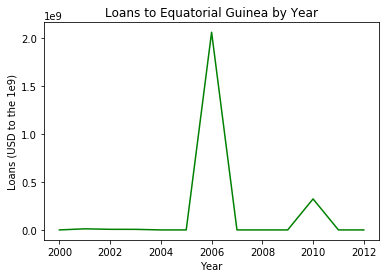

In [35]:
#Let's get a graph to help visualize
year = [2000, 2001, 2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012]
AidData = [0,1.138000e+07,6.250000e+06,5.920000e+06,0,0,2.060000e+09,0,0,0,3.230000e8,0,0]
plt.plot(year, AidData, color='g')
plt.xlabel('Year')
plt.ylabel('Loans (USD to the 1e9)')
plt.title('Loans to Equatorial Guinea by Year')
plt.show()

The largest loan to EG comes in 2006, with a US$2 billion oil backed loan. Other loans given to EG seem insubstantial in comparison. 

Let's look at where the money is coming from, and where it goes. 

In [11]:
#Where does the money go?
EquatorialGuinea.groupby(['flow_class'])['usd_current'].count().round()

flow_class
CA +Gov                     0
FDI +Gov                    0
JV +Gov                     2
ODA-like                    4
OOF-like                    2
Vague (Com)                 0
Vague (Official Finance)    5
Name: usd_current, dtype: int64

In [12]:
#where does the money come from?
EquatorialGuinea.groupby(['funding_agency'])['usd_current'].count().round()

funding_agency
China National Offshore Oil Corporation (CNOOC), State-Owned Company    0
Chinese Government, Government Agency                                   1
Export-Import Bank of China, Government Agency                          4
Name: usd_current, dtype: int64

In [13]:
#What is the intension of the aid?
EquatorialGuinea.groupby(['intent'])['usd_current'].count().round()

intent
Commercial                   3
Development                 10
Mixed (Some Development)     0
Name: usd_current, dtype: int64

Most of the aid is ODA-like. According to AirData, ODA-like means "Projects that are primarily aimed at development, include at least 25% concessionality, and have an ODA-eligible recipient (as defined by the OECD, based on country income level)."
Most of the aid comes from China's EXIM bank, and is used for development. 

## Now, let's look at Zimbabwe

In [14]:
#Create a df for Zimbabwe
Zimbabwe=df.loc[(df["recipient_oecd_name"]=="Zimbabwe")]

#Describe Zimbabwe's aid from China by year
Zimbabwe.groupby(['year'])['usd_current'].describe().round()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2000,5.0,484653979.0,8.663081e+08,250000.0,604000.0,2415895.0,420000000.0,2.000000e+09
2001,4.0,1153112.0,1.898843e+06,120816.0,211428.0,245816.0,1187500.0,4.000000e+06
2002,3.0,2311640.0,2.508006e+06,34919.0,967460.0,1900000.0,3450000.0,5.000000e+06
2003,10.0,46692000.0,8.390304e+07,20000.0,2625000.0,11450000.0,48000000.0,2.750000e+08
2004,9.0,401579099.0,7.793505e+08,211894.0,35000000.0,60000000.0,288000000.0,2.400000e+09
2005,7.0,37871684.0,3.498662e+07,3000000.0,9550895.0,40000000.0,51500000.0,1.000000e+08
2006,10.0,76297906.0,1.296208e+08,100000.0,2379164.0,12000000.0,73000000.0,4.000000e+08
2007,4.0,68219718.0,8.908393e+07,5878870.0,20219718.0,33500000.0,81500000.0,2.000000e+08
2008,4.0,2550159.0,3.279429e+06,5000.0,376250.0,1500000.0,3673909.0,7.195637e+06


In [15]:
#Sum and count of aid by year
Zimbabwe.groupby(['year'])['usd_current'].agg(['sum','count'])


,sum,count
year,,
2000,2.423270e+09,5
2001,4.612447e+06,4
2002,6.934919e+06,3
2003,4.669200e+08,10
2004,3.614212e+09,9
2005,2.651018e+08,7
2006,7.629791e+08,10
2007,2.728789e+08,4
2008,1.020064e+07,4


The number of projects in Equatorial Guinea increases during this period, and the amount of aid, although not 100% linear, also increases. 
Overall, nearly every statistic increases over this time period. 

In [37]:
#sum of Zimbabwe's aid from 2000-2012
Zimbabwe['usd_current'].sum()

24067057627.655598

In [16]:
#exporting the csvs for each country to get a better look at the aid projects in each country.
Zimbabwe.to_csv("Downloads/zimbabwe.csv")
EquatorialGuinea.to_csv("Downloads/EquatorialGuinea.csv")


Let's look at the category each aid project falls into. 

In [17]:
Zimbabwe.groupby(['flow'])['usd_current'].count().round()

flow
Debt rescheduling                               3
Export credits                                  1
Foreign direct investment                      12
Free-standing technical assistance              1
Grant (Vague)                                   3
In-kind Grant (Goods or Services)              33
Joint venture with recipient                    7
Loan (excluding debt rescheduling)             23
Loan Guarantee                                  1
Monetary Grant (excluding debt forgiveness)    21
Scholarships/training in the donor country      0
Unset                                           0
Vague-TBD                                       4
Name: usd_current, dtype: int64

In-kind Grant (Goods or Services), Loan (excluding debt rescheduling), Monetary Grant (excluding debt forgiveness), and Foreign direct investment make up a large majority of the aid given to Zimbabwe.

A major negative effect of China's aid to Zimbabwe is the amount of debt that Zimbabwe has racked up. So, let's look at the loans, where a lot of Zimbabwe's debt comes from. 

In [18]:
##grouping zimbabwe's loans and exporting it to csv for a closer inspection
Zimbabweloans=Zimbabwe.loc[(Zimbabwe["flow"]=="Loan (excluding debt rescheduling)")]
Zimbabweloans.to_csv("Downloads/zimbabweloans.csv")

#Sum and count of Zimbabwe's loans.
Zimbabweloans.groupby(['year'])['usd_current'].agg(['sum','count'])

,sum,count
year,,
2000,4.224159e+08,2
2003,7.000000e+07,1
2004,6.700000e+08,1
2005,6.300000e+07,1
2006,2.000000e+08,1
2007,2.670000e+08,3
2008,2.500000e+06,1
2010,1.790000e+08,4
2011,1.287500e+09,7


In [19]:
#And the amount of money China gives Zimbabwe in loans
Zimbabweloans['usd_current'].sum()

3324127795.3295

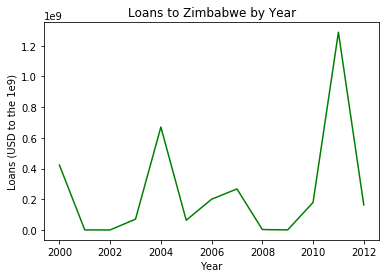

In [20]:
#Let's get a graph to help visualize
year = [2000, 2001, 2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012]
AidData = [4.224159e+08,0,0,7.000000e+07,6.700000e+08,6.300000e+07,2.000000e+08,2.670000e+08,2.500000e+06,0, 1.790000e+08, 1.287500e+09, 1.627119e+08]
plt.plot(year, AidData, color='g')
plt.xlabel('Year')
plt.ylabel('Loans (USD to the 1e9)')
plt.title('Loans to Zimbabwe by Year')
plt.show()

The amount of loans to Zimbabwe is erratic, but increases over this time period. 
Let's look at where the money comes from and where it goes.

In [21]:
#Where does the money go?
Zimbabwe.groupby(['flow_class'])['usd_current'].count().round()

flow_class
CA +Gov                      5
CA -Gov                      1
FDI +Gov                     9
FDI -Gov                     5
JV +Gov                      6
JV -Gov                      2
Military                     2
NGO Aid                      1
ODA-like                    47
OOF-like                    13
Official Investment          1
Vague (Com)                  1
Vague (Official Finance)    16
Name: usd_current, dtype: int64

In [22]:
#where does the money come from?
Zimbabwe.groupby(['funding_agency'])['usd_current'].count().round()

funding_agency
Anhui Foreign Economic Construction Group Co., Ltd. (AFECC), State-Owned Company                                                                                                                                                                                                                                                                                                2
China Development Bank (CDB), Government Agency                                                                                                                                                                                                                                                                                                                                 3
China International Fund (CIF), Private Sector                                                                                                                                                                                                       

In [23]:
Zimbabwe.groupby(['intent'])['usd_current'].count().round()

intent
Commercial                  20
Development                 69
Mixed (No Development)       1
Mixed (Some Development)    15
Representational             4
Name: usd_current, dtype: int64

Like EG, most aid is ODA-like. Next is OOF-like, which means "Projects that do not meet the criteria for ODA because they are: not primarily focused on development, not sufficiently concessional, or are provided to a country that is not eligible for ODA". The funding comes from a variety of sources, with a substantial amount coming from China's EXIM bank.
Again, we see that the intention of the aid is mostly development. 

## Now, let's look at only official flows

In [24]:
#Let's read in only the official flows
l = [pd.read_csv(filename, encoding = "ISO-8859-1", low_memory = False) for filename in glob.glob("Documents/china/official_finance.csv")]
df = pd.concat(l, axis=0)
df.head()

,project_id,donor,title,year,year_uncertain,description,crs_sector_code,crs_sector_name,sector_comment,status,...,is_ground_truthing,loan_type,interest_rate,maturity,grace_period,grant_element,updated_at,location_details,contacts,is_official_finance
0,1728,China,Donation to a Local Agriculture Group--Diversi...,2010,False,The Government of China has made an initial do...,310,"Agriculture, Forestry and Fishing",NaN,Completion,...,False,NaN,NaN,NaN,NaN,NaN,7/3/13 10:42,NaN,"Li Zhigong,",1
1,19626,China,E-government network,2010,False,Togo has secured a USD 25 million loan from Ch...,150,Government and Civil Society,NaN,Pipeline: Commitment,...,False,Concessional,2.0,20.0,5.0,54.08,6/20/13 13:17,NaN,"Adji Otheth Ayassor,",1
2,868,China,ECOWAS: experts to assess future development p...,2011,False,"In August 2011, the Commission of the Economic...",150,Government and Civil Society,"Agriculture, governmet, humanitarian",Pipeline: Pledge,...,False,NaN,NaN,NaN,NaN,NaN,8/1/13 12:28,NaN,"Ambassador James Victor Gbeho,",1
3,1043,China,KPLC Power generation expansion (may overlap w...,2005,False,"On September 1, 2005 managing director of Keny...",230,Energy Generation and Supply,NaN,Implementation,...,False,Concessional,NaN,NaN,NaN,NaN,3/26/13 15:40,NaN,"Kiraitu Murungi, ; Jasper Oduor,",1
4,108,China,Kipsigak-Serem-Shamakhokho road project,2001,False,"A project to build a 54-km-long highway, start...",210,Transport and Storage,Transport; Road,Completion,...,False,Concessional,NaN,NaN,NaN,NaN,8/6/13 14:53,Western Kenya,"Raphael Tuju, ; Mr. Du Qiwen, ; Dr. Mukhisa Ki...",1


In [25]:
#And let's describe the aid by year.
df.groupby(['year'])['usd_current'].describe().round()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2000,37.0,56291451.0,1.773004e+08,20000.0,604000.0,2823360.0,18119215.0,1.000000e+09
2001,67.0,14831817.0,2.611409e+07,37479.0,2343844.0,3624472.0,12840786.0,1.396053e+08
2002,64.0,15577040.0,4.717956e+07,10346.0,785313.0,2800000.0,5855486.0,2.977500e+08
2003,65.0,42739355.0,1.231280e+08,4461.0,500000.0,3624486.0,10000000.0,6.000000e+08
2004,71.0,44391571.0,1.515139e+08,6500.0,604098.0,2416393.0,10500000.0,1.000000e+09
2005,83.0,31906918.0,8.499338e+07,2712.0,325242.0,3661074.0,24500000.0,5.120000e+08
2006,130.0,71798670.0,2.957567e+08,5000.0,1254164.0,5016656.0,26500000.0,2.500000e+09
2007,135.0,99902293.0,5.290467e+08,6260.0,2628973.0,10000000.0,49318003.0,6.000000e+09
2008,92.0,131752628.0,5.879228e+08,22331.0,2462080.0,7195637.0,42125000.0,5.000000e+09


Clearly, there is less aid when only looking at official flows. China is not required to disclose all of its aid, meaning that only looking at official flows will give you a lower value than the actual value. The real value and amount of aid is likely in the middle of the official flows, and the flows AirData reports.  

In [26]:
#The sum of the aid by year
df.groupby(['year'])['usd_current'].sum().round()

year
2000    2.082784e+09
2001    9.937317e+08
2002    9.969306e+08
2003    2.778058e+09
2004    3.151802e+09
2005    2.648274e+09
2006    9.333827e+09
2007    1.348681e+10
2008    1.212124e+10
2009    1.694119e+10
2010    1.543332e+10
2011    1.033329e+10
2012    3.273001e+10
Name: usd_current, dtype: float64

Now, let's compare the amount of aid that is determined from the official dataset and the amount of  aid that's determined by media.

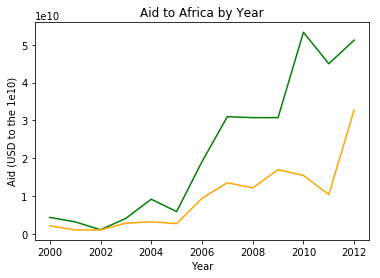

In [27]:
year = [2000, 2001, 2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012]
AidData = [4.305634e+09,3.125066e+09,1.036389e+09, 4.051353e+09,9.122517e+09,5.838228e+09,1.905579e+10, 3.096801e+10, 3.071839e+10, 3.071509e+10,5.332455e+10, 4.497291e+10, 5.123994e+10]
Official = [2.082784e+09,9.937317e+08,9.969306e+08,2.778058e+09,3.151802e+09, 2.648274e+09, 9.333827e+09,1.348681e+10,1.212124e+10,1.694119e+10,1.543332e+10,1.033329e+10,3.273001e+10]
plt.plot(year, AidData, color='g')
plt.plot(year, Official, color='orange')
plt.xlabel('Year')
plt.ylabel('Aid (USD to the 1e10)')
plt.title('Aid to Africa by Year')
plt.show()

The green line is AirData's report and the orange line is officially reported aid. As we can see, both lines increase over time, and the difference between the two lines grows as well. AirData's aid seems to be about double that of the officially reported aid. 